In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences



In [3]:
# Load the dataset (only keep top 10,000 most frequent words)
vocab_size = 10000
max_length = 500

# Load data (already split into train and test)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Pad sequences to ensure equal input size
x_train = pad_sequences(x_train, maxlen=max_length)
x_test = pad_sequences(x_test, maxlen=max_length)

print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)


Training data shape: (25000, 500)
Testing data shape: (25000, 500)


In [4]:
x_train


array([[   0,    0,    0, ...,   19,  178,   32],
       [   0,    0,    0, ...,   16,  145,   95],
       [   0,    0,    0, ...,    7,  129,  113],
       ...,
       [   0,    0,    0, ...,    4, 3586,    2],
       [   0,    0,    0, ...,   12,    9,   23],
       [   0,    0,    0, ...,  204,  131,    9]])

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout

# Define the model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=32, input_length=max_length),
    GlobalAveragePooling1D(),  # Converts the 2D output to 1D
    Dense(64, activation='relu'),  # Hidden layer
    Dropout(0.5),  # Regularization to prevent overfitting
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()



C:\Users\anike\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ ?                           │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Train the model
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=512,
    validation_split=0.2,  # Use 20% of training data for validation
    verbose=1
)


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.5057 - loss: 0.6928 - val_accuracy: 0.5852 - val_loss: 0.6889
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.5645 - loss: 0.6847 - val_accuracy: 0.6268 - val_loss: 0.6649
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.6628 - loss: 0.6521 - val_accuracy: 0.7158 - val_loss: 0.6036
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.7046 - loss: 0.5945 - val_accuracy: 0.7782 - val_loss: 0.5294
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.7850 - loss: 0.5113 - val_accuracy: 0.7820 - val_loss: 0.4698
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.8134 - loss: 0.4511 - val_accuracy: 0.7862 - val_loss: 0.4417
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.8242 - loss: 0.4090 - val_accuracy: 0.8622 - val_loss: 0.3706
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.8431 - loss: 0.3706 - val_accuracy: 0.8652 - v

In [5]:
# Evaluate on test data
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8718 - loss: 0.3288
Test Accuracy: 0.8713


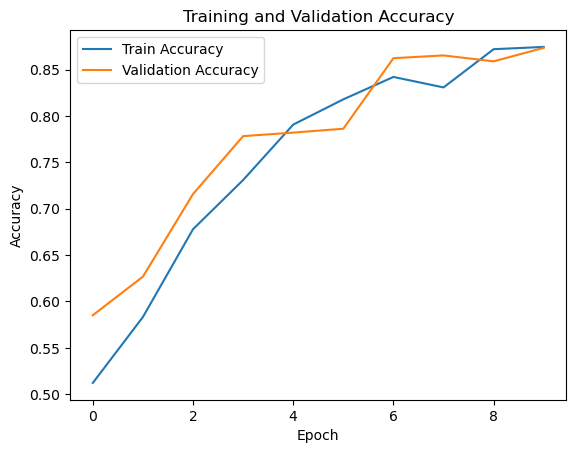

In [6]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [8]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

y_pred = (model.predict(x_test) > 0.5).astype("int32")



782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [13]:
cm = confusion_matrix(y_test, y_pred)


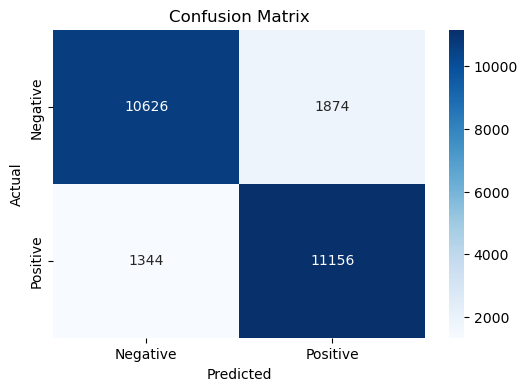

In [14]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Define class labels
class_names = ['Negative', 'Positive']

# Create the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# ✅ What Each Cell Means:
# True Positives (TP = 11,156): Model correctly predicted the review was positive.

# True Negatives (TN = 10,626): Model correctly predicted the review was negative.

# False Positives (FP = 1,874): Model predicted positive, but it was actually negative (Type I Error).

# False Negatives (FN = 1,344): Model predicted negative, but it was actually positive (Type II Error).